# Analysis on Advertising investment

## Read the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Advertising.csv')
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


## split the data and display

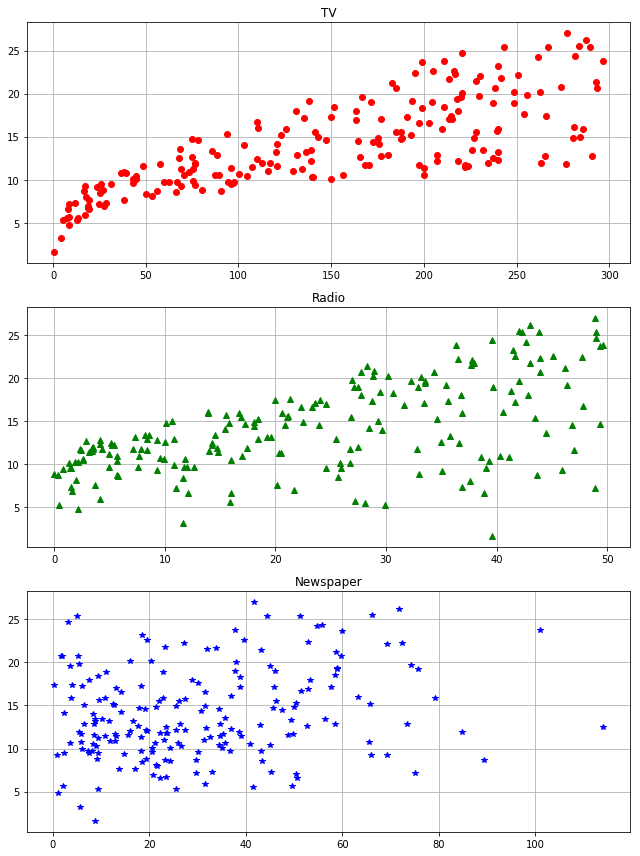

In [3]:
x = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]
plt.figure(figsize=(9, 12))
plt.subplot(311)
plt.plot(data['TV'], y, 'ro')  # red circle scatter plot
plt.title('TV')
plt.grid()
plt.subplot(312)
plt.plot(data['Radio'], y, 'g^')  # blue circle scatter plot
plt.title('Radio')
plt.grid()
plt.subplot(313)
plt.plot(data['Newspaper'], y, 'b*')  # blue circle scatter plot
plt.title('Newspaper')
plt.grid()
plt.tight_layout()
plt.show()

## select feature name

In [4]:
feature_col = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of original DataFrame

x = data[feature_col]
print(x.shape)
print(type(x))

y = data['Sales']


(200, 3)
<class 'pandas.core.frame.DataFrame'>


## Training

In [8]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
model = linreg.fit(x_train, y_train)

print(model)
print(linreg.intercept_)
print(linreg.coef_)

# pair the feature names with the coefficients
zip(feature_col, linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
2.87696662232
[ 0.04656457  0.17915812  0.00345046]


## Prediction

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]
<class 'numpy.ndarray'>
RMSE1.40465142303


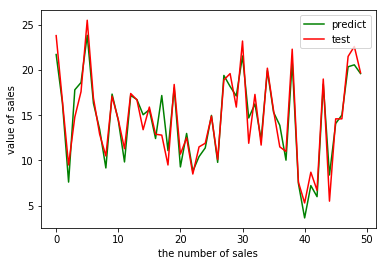

In [9]:
y_pred = linreg.predict(x_test)
print(y_pred)
print(type(y_pred))

from sklearn import metrics
import numpy as np

sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i]) ** 2
print('RMSE', end='')
print(np.sqrt(sum_mean/len(y_pred)))

plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'g', label='predict')
plt.plot(range(len(y_pred)), y_test, 'r', label='test')
plt.legend(loc = 'upper right')
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

Analysis :The scatter plot for Newspaper investment and sales shows weak linear relationship.
In addition, the coefficient number for newspaper is almost negative. This is not a 
good indicator for sales. We will drop the newspaper and do the calculation again.

(200, 2)
<class 'pandas.core.frame.DataFrame'>
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
2.92723732027
[ 0.04660234  0.18117959]
[ 21.73751851  16.40451622   7.64073276  17.81512707  18.6140367
  23.75320401  16.26267467  13.30968011   9.11623605  17.24121988
  14.37997584   9.86630093  17.28107008  16.70455883  14.93571851
  15.47067849  12.39847009  17.21737409  11.18626133  18.09114847
   9.34543641  12.71804909   8.75327159  10.468843    11.34116649
  14.98646893   9.77329331  19.43186663  18.31005062  17.14215851
  21.62609193  14.47149683  16.3536012   12.27215653  19.97488243
  15.34878155  13.90760851   9.99030388  20.98440888   7.482353
   3.61019982   7.1944428    5.99097416  18.39958364   8.35858094
  14.12195436  15.05074527  20.38304162  20.65191677  19.47457534]
<class 'numpy.ndarray'>
RMSE1.38790346994


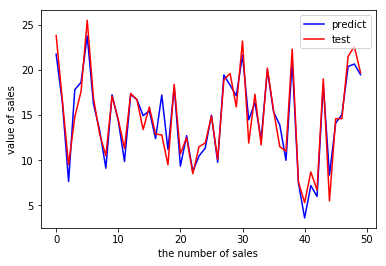

In [11]:
feature_col = ['TV', 'Radio']

# use the list to select a subset of original DataFrame

x = data[feature_col]
print(x.shape)
print(type(x))

y = data['Sales']

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
model = linreg.fit(x_train, y_train)

print(model)
print(linreg.intercept_)
print(linreg.coef_)

# pair the feature names with the coefficients
zip(feature_col, linreg.coef_)

y_pred = linreg.predict(x_test)
print(y_pred)
print(type(y_pred))

from sklearn import metrics
import numpy as np

sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i]) ** 2
print('RMSE', end='')
print(np.sqrt(sum_mean/len(y_pred)))

plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b', label='predict')
plt.plot(range(len(y_pred)), y_test, 'r', label='test')
plt.legend(loc = 'upper right')
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

Further analysis: When we use less indicators, the prediction result is better with RMSE only 1.38 comparing to the 1.4
This model is slightly better than the last one.